Number of contours detected: 8931
Number of texts: 292


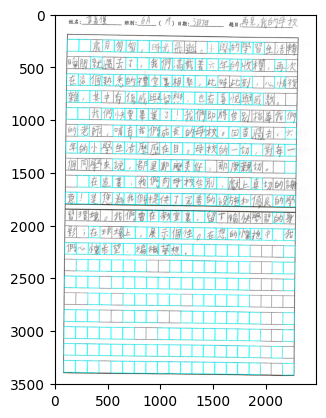

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/sample2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray, 50, 255, 0)
contours, hierarchy = cv2.findContours(thresh, 1, 2)
print("Number of contours detected:", len(contours))

text_loc = []
for cnt in contours:
  x1, y1 = cnt[0][0]
  approx = cv2.approxPolyDP(cnt, 50, True)
  if len(approx) == 4:
    x, y, w, h = cv2.boundingRect(cnt)
    ratio = float(w)/h
    if ratio >= 0.9 and ratio <= 1.1:
      img = cv2.drawContours(img, [cnt], -1, (0,255,255), 3)
      text_loc.append([x,y,w,h])

print("Number of texts:", len(text_loc))
plt.imshow(img)

In [ ]:
def crop(image, x,y,w,h):
  crop_image = image[y:y+h, x:x+w]
  return crop_image

(112, 109, 3)


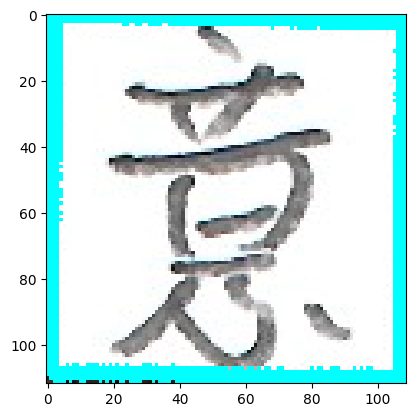

In [ ]:
# [98, 1688, 109, 112],
crop_image = crop(img, 98, 1688, 109, 112)
print(crop_image.shape)
plt.imshow(crop_image)

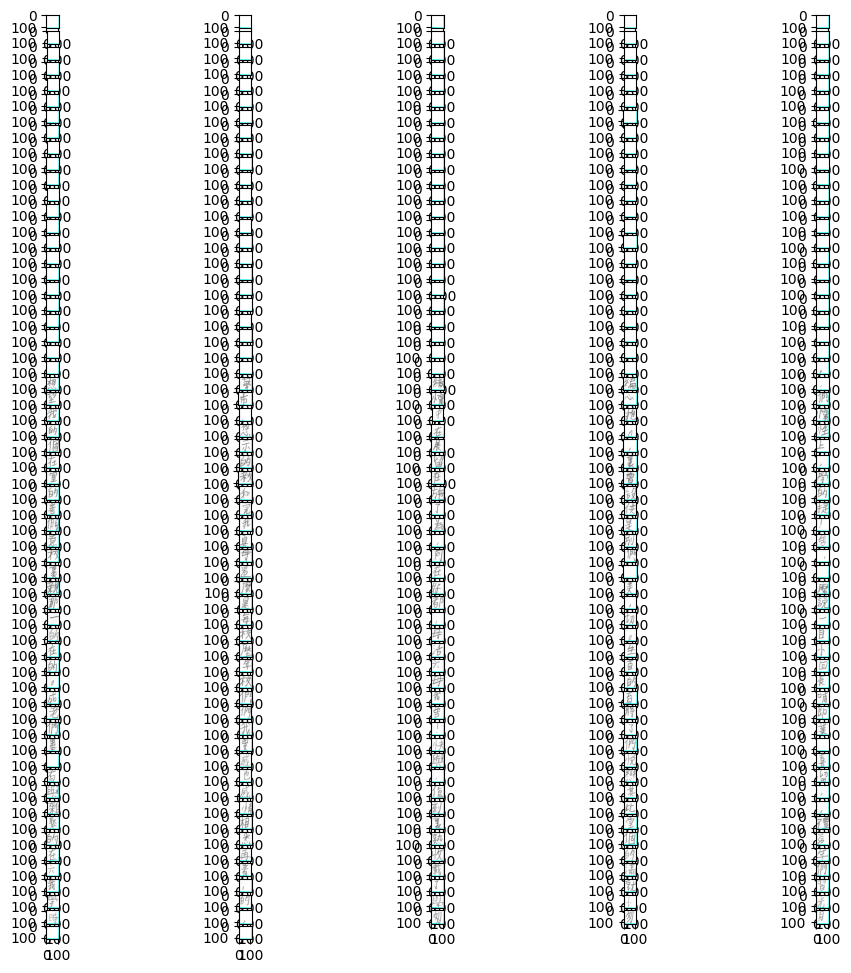

In [ ]:
plt.gcf().set_size_inches((12,12))
for i in range(len(text_loc)):
  plt.subplot(int(len(text_loc)/5)+1,5,i+1)
  crop_img = crop(img, text_loc[i][0], text_loc[i][1], text_loc[i][2], text_loc[i][3])
  plt.imshow(crop_img)